In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [4]:
df.shape

(150000, 21)

In [5]:
numerical= ["Avg VTAT","Avg CTAT","Cancelled Rides by Customer","Customer Rating"]


for col in numerical:
    df[col] = df[col].fillna(value = df[col].mean(),inplace = True)
cols_to_fix = ["Reason for cancelling by Customer","Payment Method"]

# This only fills the NaNs in these three specific columns
df["Reason for cancelling by Customer"] = df["Reason for cancelling by Customer"].dropna()
df[["Reason for cancelling by Customer","Payment Method"]]

,Reason for cancelling by Customer,Payment Method
0,NaN,NaN
1,NaN,UPI
2,NaN,Debit Card
3,NaN,UPI
4,NaN,UPI
...,...,...
149995,NaN,Uber Wallet
149996,NaN,UPI
149997,NaN,Cash
149998,NaN,UPI


([<matplotlib.patches.Wedge at 0x19a044ac230>,
 [Text(0.83655341702063, 0.7142677232460585, 'Wrong Address'),
  Text(-0.5717991060926543, 0.9397051570953742, 'Change of plans'),
  Text(-1.0221471922272614, -0.40646662522515437, 'Driver is not moving towards pickup location'),
  Text(0.21096671619912657, -1.079580031612366, 'Driver asked to cancel'),
  Text(1.0349688465473765, -0.3726117103318052, 'AC is not working')])

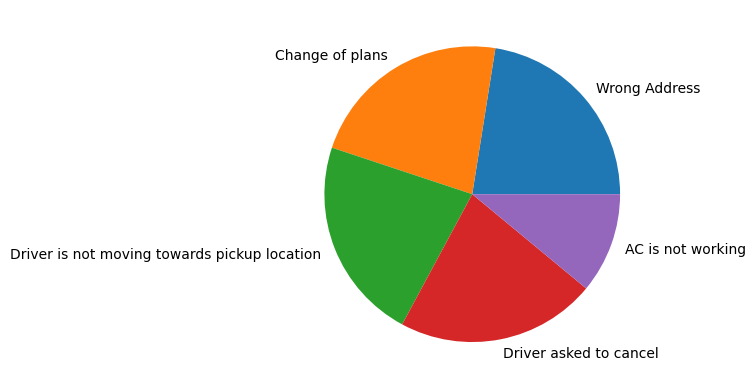

In [6]:
cancelled_by_customer_counts = df["Reason for cancelling by Customer"].value_counts()
plt.pie(cancelled_by_customer_counts,labels = cancelled_by_customer_counts.index)

In [7]:
df_for_customer_rating = df.dropna(subset=["Customer Rating"])
df_for_customer_rating

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method


([<matplotlib.patches.Wedge at 0x19a020a6f30>,
 [Text(0.7699039534546471, 0.7856512600733896, 'Customer related issue'),
  Text(-0.7934932174228922, 0.7618192133989972, 'The customer was coughing/sick'),
  Text(-0.7639399767675483, -0.7914516484892794, 'Personal & Car related issues'),
  Text(0.7835881195420339, -0.7720036650901209, 'More than permitted people in there')])

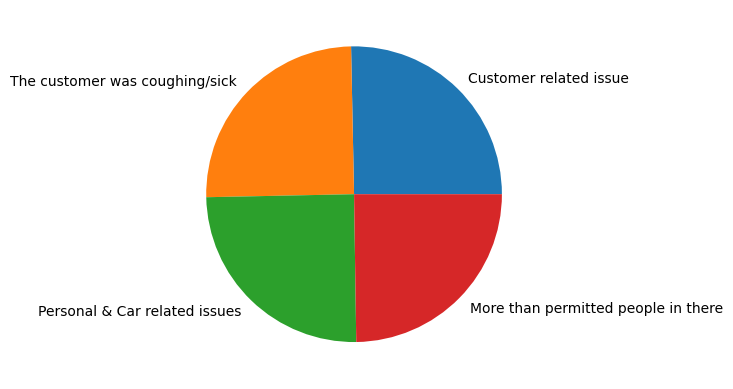

In [8]:
df["Driver Cancellation Reason"] = df["Driver Cancellation Reason"].dropna()
cancelled_by_driver_counts = df["Driver Cancellation Reason"].value_counts()
plt.pie(cancelled_by_driver_counts,labels = cancelled_by_driver_counts.index)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_trips = (
    df.groupby('Month')
      .size()
      .reset_index(name='Total_Trips')
)

print(monthly_trips)

      Month  Total_Trips
0   2024-01        12861
1   2024-02        11927
2   2024-03        12719
3   2024-04        12199
4   2024-05        12778
5   2024-06        12440
6   2024-07        12897
7   2024-08        12636
8   2024-09        12248
9   2024-10        12651
10  2024-11        12394
11  2024-12        12250


In [10]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Month
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,2024-03
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,None,None,...,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,None,UPI,2024-11
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,None,None,...,NaN,NaN,NaN,NaN,627.0,13.58,4.9,None,Debit Card,2024-08
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,None,None,...,NaN,NaN,NaN,NaN,416.0,34.02,4.6,None,UPI,2024-10
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,None,None,...,NaN,NaN,NaN,NaN,737.0,48.21,4.1,None,UPI,2024-09


<Axes: xlabel='Month', ylabel='Total_Trips'>

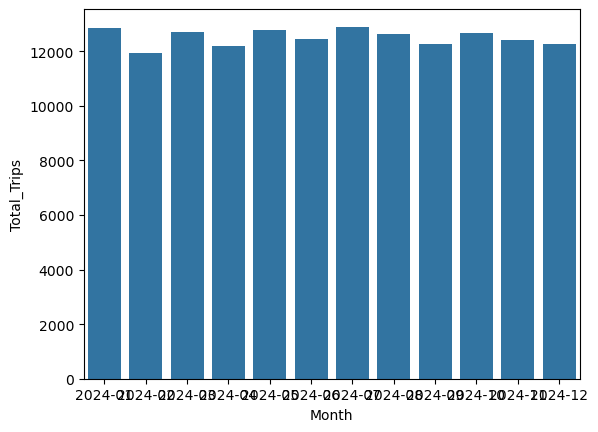

In [11]:
sns.barplot(x='Month', y='Total_Trips', data = monthly_trips)

In [12]:
cancelled_by_customers_monthly = df[["Reason for cancelling by Customer","Month"]]
cancelled_by_customers_monthly.dropna()

,Reason for cancelling by Customer,Month
18,Driver is not moving towards pickup location,2024-11
39,Driver is not moving towards pickup location,2024-09
46,Driver asked to cancel,2024-08
62,Driver is not moving towards pickup location,2024-02
78,Driver asked to cancel,2024-11
...,...,...
149943,Wrong Address,2024-05
149952,Driver asked to cancel,2024-04
149956,Driver is not moving towards pickup location,2024-10
149963,Driver is not moving towards pickup location,2024-02


In [13]:
df_dropped = cancelled_by_customers_monthly.dropna().copy()
df_dropped['count'] = df_dropped.groupby('Month').cumcount()

# 2. عمل pivot بحيث تصبح الشهور هي الأعمدة
result = df_dropped.pivot(index='count', columns='Month', values='Reason for cancelling by Customer')

# 3. اختيارياً: حذف اسم الـ index ليكون الجدول نظيفاً
result.index.name = None
result = result.fillna("No Data")
# عرض النتيجة
result

Month,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,Driver asked to cancel,Driver is not moving towards pickup location,AC is not working,Driver asked to cancel,Driver asked to cancel,Change of plans,Driver asked to cancel,Driver asked to cancel,Driver is not moving towards pickup location,AC is not working,Driver is not moving towards pickup location,Wrong Address
1,Wrong Address,Wrong Address,Change of plans,Driver asked to cancel,Change of plans,Driver asked to cancel,Wrong Address,Driver asked to cancel,Change of plans,Wrong Address,Driver asked to cancel,Wrong Address
2,Driver asked to cancel,Change of plans,Driver is not moving towards pickup location,Change of plans,AC is not working,Change of plans,Driver asked to cancel,Change of plans,AC is not working,Driver is not moving towards pickup location,AC is not working,Driver is not moving towards pickup location
3,Driver asked to cancel,Wrong Address,Driver asked to cancel,Driver is not moving towards pickup location,Wrong Address,Driver asked to cancel,Change of plans,Driver asked to cancel,Change of plans,Driver is not moving towards pickup location,Driver is not moving towards pickup location,Change of plans
4,Wrong Address,Wrong Address,Driver asked to cancel,Driver asked to cancel,Wrong Address,Driver is not moving towards pickup location,Change of plans,AC is not working,Driver is not moving towards pickup location,Change of plans,AC is not working,Change of plans
...,...,...,...,...,...,...,...,...,...,...,...,...
927,No Data,No Data,No Data,No Data,No Data,No Data,Driver asked to cancel,No Data,No Data,No Data,No Data,No Data
928,No Data,No Data,No Data,No Data,No Data,No Data,Change of plans,No Data,No Data,No Data,No Data,No Data
929,No Data,No Data,No Data,No Data,No Data,No Data,Driver is not moving towards pickup location,No Data,No Data,No Data,No Data,No Data
930,No Data,No Data,No Data,No Data,No Data,No Data,Driver asked to cancel,No Data,No Data,No Data,No Data,No Data


([<matplotlib.patches.Wedge at 0x19a05602810>,
 [Text(0.8308829073990098, 0.7208561536063688, ''),
  Text(-0.5744322093103672, 0.9380978823698572, ''),
  Text(-1.0497678091013962, -0.3286145872819017, ''),
  Text(-0.0592974820306321, -1.0984005683833322, ''),
  Text(0.8500173794330345, -0.6981908440117194, ''),
  Text(1.0850295331918611, -0.1808615827130023, '')])

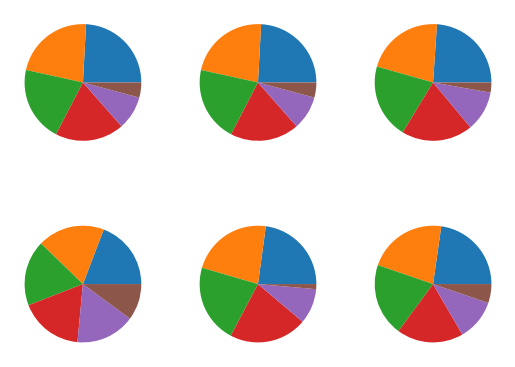

In [14]:

plt.subplot(2 ,3 , 1)
month1 = result["2024-01"].value_counts()
plt.pie(month1)

plt.subplot(2 ,3 , 2)
month2 = result["2024-02"].value_counts()
plt.pie(month1)

plt.subplot(2 ,3 , 3)
month3 = result["2024-03"].value_counts()
plt.pie(month3)

plt.subplot(2 ,3 , 4)
month4 = result["2024-04"].value_counts()
plt.pie(month4)

plt.subplot(2 ,3 , 5)
month5 = result["2024-05"].value_counts()
plt.pie(month5)

plt.subplot(2 ,3 , 6)
month6 = result["2024-06"].value_counts()
plt.pie(month6)


C:\Users\Dubai\AppData\Local\Temp\ipykernel_7456\2660880547.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


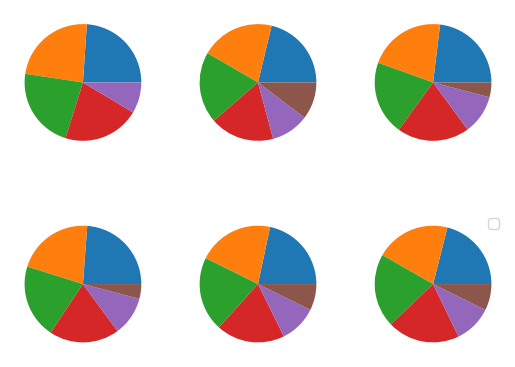

In [15]:
plt.subplot(2 ,3 , 1)
month7 = result["2024-07"].value_counts()
plt.pie(month7)

plt.subplot(2 ,3 , 2)
month8 = result["2024-08"].value_counts()
plt.pie(month8)

plt.subplot(2 ,3 , 3)
month9 = result["2024-09"].value_counts()
plt.pie(month9)

plt.subplot(2 ,3 , 4)
month10 = result["2024-10"].value_counts()
plt.pie(month10)

plt.subplot(2 ,3 , 5)
month11 = result["2024-11"].value_counts()
plt.pie(month11)

plt.subplot(2 ,3 , 6)
month12 = result["2024-12"].value_counts()
plt.pie(month12)
plt.legend()

In [17]:
v_type = df[["Vehicle Type","Booking Value","Booking Status","Ride Distance"]]
v_type.dropna()

,Vehicle Type,Booking Value,Booking Status,Ride Distance
1,Go Sedan,237.0,Incomplete,5.73
2,Auto,627.0,Completed,13.58
3,Premier Sedan,416.0,Completed,34.02
4,Bike,737.0,Completed,48.21
5,Auto,316.0,Completed,4.85
...,...,...,...,...
149995,Go Mini,475.0,Completed,40.08
149996,Go Mini,1093.0,Completed,21.31
149997,Go Sedan,852.0,Completed,15.93
149998,Auto,333.0,Completed,45.54


In [21]:
# 1. تعريف حالات النجاح (Completed) لحساب الـ success booking value لاحقاً
df = v_type.dropna().copy()

# 2. إجراء التجميع والعمليات الحسابية
result = df.groupby('Vehicle Type').agg(
    total_booking_value=('Booking Value', 'sum'),
    success_booking_value=('Booking Value', lambda x: x[df.loc[x.index, 'Booking Status'] == 'Completed'].sum()),
    average_distance_travelled=('Ride Distance', 'mean'),
    total_distance_travelled=('Ride Distance', 'sum')
)

# 3. إعادة تعيين الـ index لجعل Vehicle Type عمود عادي
result = result.reset_index()

# عرض النتيجة
result

,Vehicle Type,total_booking_value,success_booking_value,average_distance_travelled,total_distance_travelled
0,Auto,12878422.0,11727615.0,24.615996,625615.53
1,Bike,7837697.0,7144913.0,24.649546,378666.33
2,Go Mini,10338496.0,9411418.0,24.612090,501200.60
3,Go Sedan,9369719.0,8538560.0,24.609325,450793.61
4,Premier Sedan,6275332.0,5733655.0,24.598956,302936.14
5,Uber XL,1528032.0,1406256.0,24.402893,74306.81
6,eBike,3618485.0,3298157.0,24.990415,179456.17
